In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dampings = np.linspace(0, 300.0, num=10)  # 0~100
stiffnesses = np.linspace(500.0, 2500.0, num=10)  # 200~1400

idx = 0

control_data = []

for damping in dampings:
    for stiffness in stiffnesses:
        control_data.append([idx, damping, stiffness])
        idx += 1

control_data = np.array(control_data)

control_df = pd.DataFrame(control_data, columns=["EXP", "damping", "stiffness"])

control_df["EXP"] = control_df["EXP"].astype(int)

control_df

,EXP,damping,stiffness
0,0,0.0,500.000000
1,1,0.0,722.222222
2,2,0.0,944.444444
3,3,0.0,1166.666667
4,4,0.0,1388.888889
...,...,...,...
95,95,300.0,1611.111111
96,96,300.0,1833.333333
97,97,300.0,2055.555556
98,98,300.0,2277.777778


In [25]:
csv_file = "/home/min/7cmdehdrb/project_th/gain_tuner100.csv"

data_df = pd.read_csv(csv_file)

mean_data = [
    [
        "EXP",
        "ShoulderPan_PE",
        "ShoulderPan_VE",
        "ShoulderLift_PE",
        "ShoulderLift_VE",
        "Elbow_PE",
        "Elbow_VE",
        "Wrist1_PE",
        "Wrist1_VE",
        "Wrist2_PE",
        "Wrist2_VE",
        "Wrist3_PE",
        "Wrist3_VE",
    ]
]
exps = range(0, 100)

for exp in exps:
    temp_data_df = data_df[data_df["EXP"] == exp]

    abs_values = temp_data_df.drop(columns=["EXP"]).abs()
    mean_values = abs_values.mean()
    # mean_values = temp_data_df.drop(columns=["EXP"]).mean()
    mean_values = mean_values.to_list()
    mean_values.insert(0, exp)
    mean_data.append(mean_values)

mean_data = np.array(mean_data)
mean_data_df = pd.DataFrame(mean_data[1:], columns=mean_data[0])


a = 1.0  # 가중치

# 결과 담을 dict
result = {"EXP": mean_data_df["EXP"]}  # EXP는 그대로 유지

# 컬럼 이름에서 접두 추출
for col in mean_data_df.columns:
    if col.endswith("_PE"):
        prefix = col[:-3]  # 접두 추출 (예: ShoulderPan)
        pe_col = f"{prefix}_PE"
        ve_col = f"{prefix}_VE"

        if ve_col in mean_data_df.columns:
            result[prefix] = a * np.abs(mean_data_df[pe_col].astype(float)) + (
                1 - a
            ) * np.abs(mean_data_df[ve_col].astype(float))

# 새 데이터프레임 생성
new_error_df = pd.DataFrame(result)
display(new_error_df)

,EXP,ShoulderPan,ShoulderLift,Elbow,Wrist1,Wrist2,Wrist3
0,0,0.010324,0.002305,0.010784,0.008890,0.002077,0.036256
1,1,0.023543,0.008915,0.001744,0.017850,0.001811,0.014835
2,2,0.013085,0.019016,0.004031,0.009634,0.004869,0.027569
3,3,0.015342,0.001272,0.007254,0.248313,0.005693,0.024165
4,4,0.003890,0.002998,0.043738,0.015317,0.021009,0.009166
...,...,...,...,...,...,...,...
95,95,0.021173,0.030068,0.094997,0.020702,0.001856,0.048589
96,96,0.032682,0.070049,0.013566,0.027298,0.014095,0.081531
97,97,0.025432,0.016891,0.064688,0.025735,0.058495,0.011531
98,98,0.004216,0.023735,0.082022,0.019761,0.011908,0.019327


In [26]:
merged_df = pd.concat([control_df, new_error_df.drop(columns=["EXP"])], axis=1)

merged_df.to_csv("/home/min/7cmdehdrb/project_th/gain_tuner_merged102.csv", index=False)

merged_df

,EXP,damping,stiffness,ShoulderPan,ShoulderLift,Elbow,Wrist1,Wrist2,Wrist3
0,0,0.0,500.000000,0.010324,0.002305,0.010784,0.008890,0.002077,0.036256
1,1,0.0,722.222222,0.023543,0.008915,0.001744,0.017850,0.001811,0.014835
2,2,0.0,944.444444,0.013085,0.019016,0.004031,0.009634,0.004869,0.027569
3,3,0.0,1166.666667,0.015342,0.001272,0.007254,0.248313,0.005693,0.024165
4,4,0.0,1388.888889,0.003890,0.002998,0.043738,0.015317,0.021009,0.009166
...,...,...,...,...,...,...,...,...,...
95,95,300.0,1611.111111,0.021173,0.030068,0.094997,0.020702,0.001856,0.048589
96,96,300.0,1833.333333,0.032682,0.070049,0.013566,0.027298,0.014095,0.081531
97,97,300.0,2055.555556,0.025432,0.016891,0.064688,0.025735,0.058495,0.011531
98,98,300.0,2277.777778,0.004216,0.023735,0.082022,0.019761,0.011908,0.019327


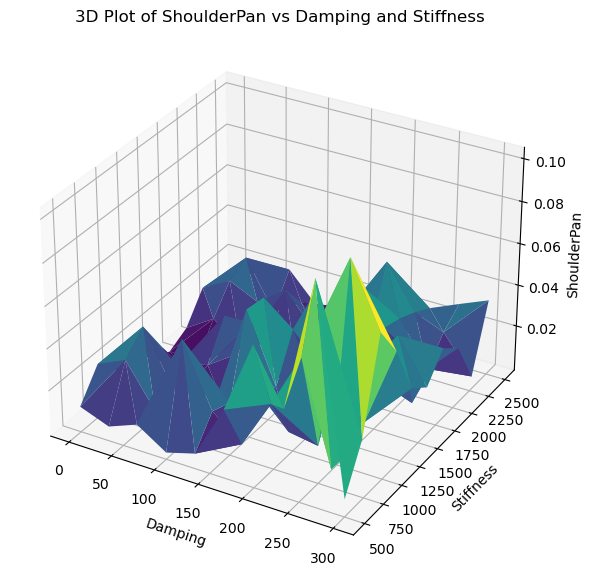

In [27]:
from mpl_toolkits.mplot3d import Axes3D

damping = merged_df["damping"].values
stiffness = merged_df["stiffness"].values
shoulder_pan = merged_df["ShoulderPan"].values
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_trisurf(damping, stiffness, shoulder_pan, cmap="viridis", edgecolor="none")
ax.set_xlabel("Damping")
ax.set_ylabel("Stiffness")
ax.set_zlabel("ShoulderPan")
ax.set_title("3D Plot of ShoulderPan vs Damping and Stiffness")
plt.show()

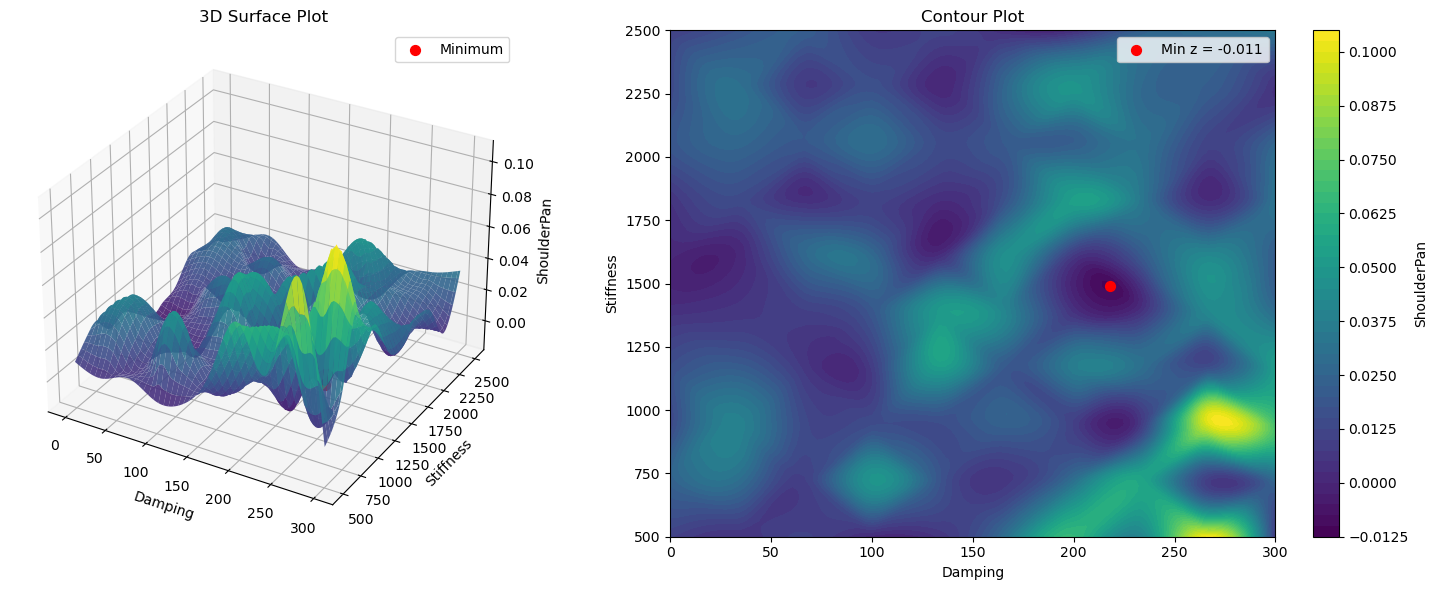

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 데이터 준비
x = merged_df["damping"].values
y = merged_df["stiffness"].values
z = merged_df["ShoulderPan"].values

# 보간을 위한 그리드 생성
xi = np.linspace(np.min(x), np.max(x), 100)
yi = np.linspace(np.min(y), np.max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# z 값 보간 (cubic 보간)
zi = griddata((x, y), z, (xi, yi), method="cubic")

# 최소값 위치 찾기
min_idx = np.unravel_index(np.nanargmin(zi), zi.shape)
min_x, min_y, min_z = xi[min_idx], yi[min_idx], zi[min_idx]

# 시각화
fig = plt.figure(figsize=(16, 6))

# 1. 3D 서피스 플롯
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax1.plot_surface(xi, yi, zi, cmap="viridis", edgecolor="none", alpha=0.9)
ax1.scatter(min_x, min_y, min_z, color="red", s=50, label="Minimum")
ax1.set_xlabel("Damping")
ax1.set_ylabel("Stiffness")
ax1.set_zlabel("ShoulderPan")
ax1.set_title("3D Surface Plot")
ax1.legend()

# 2. 등고선 플롯
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(xi, yi, zi, levels=50, cmap="viridis")
ax2.scatter(min_x, min_y, color="red", s=50, label=f"Min z = {min_z:.3f}")
fig.colorbar(contour, ax=ax2, label="ShoulderPan")
ax2.set_xlabel("Damping")
ax2.set_ylabel("Stiffness")
ax2.set_title("Contour Plot")
ax2.legend()

plt.tight_layout()
plt.show()